# Maps derived variables
- average Rx1day, TXx, TNn


In [ ]:
import xarray as xr
import valenspy as vp
from datatree import DataTree
from pathlib import Path
import pandas as pd
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import os


#Get the git directory using the Path object using an os command
git_dir = Path(os.popen("git rev-parse --show-toplevel").read().strip())


#User options
variables_toload = ["pr", "tasmax", "tasmin"]
variables = ["Rx1day", "TXx", "TNn"]
period = [1980,2019]
target_grid="/dodrio/scratch/projects/2022_200/external/climate_grid/TEMP_AVG_CLIMATE_GRID_1954_2023_daily.nc"

############################################
# STEP 1: Loading the data

# start input manager
manager = vp.InputManager(machine="hortense")


#MODEL data
# Load the ALARO data
df_alaro = pd.read_csv("/dodrio/scratch/users/vsc31332/rmi/vsc31332_inne/ValEnsPy/CORDEX_eval_scripts/catalog.csv")
df_alaro = df_alaro[df_alaro['frequency'] == 'day']
df_alaro = df_alaro[df_alaro['variable_id'].isin(variables_toload)]
df_alaro

#Load all the paths in the df into one xarray dataset
ds_alaro = xr.open_mfdataset(df_alaro['path'].values, decode_coords='all', chunks="auto")
ds_alaro

# Load the COSMO data
## Issue - variarble names are hardcoded due to daily statistic, necessary to find correct path with input managera
experiment     = "CB2_CCLM_BEL28_ERA5_evaluation"
ds_cclm_pr  = manager.load_data("CCLM", ["pr"], freq="daily", path_identifiers=[experiment, "sum"])
ds_cclm_tasmax = manager.load_data("CCLM", ["tas"], freq="daily", path_identifiers=[experiment, "max"]).rename({'tas':'tasmax'})
ds_cclm_tasmin = manager.load_data("CCLM", ["tas"], freq="daily", path_identifiers=[experiment, "min"]).rename({'tas':'tasmin'})
ds_cclm = xr.merge([ds_cclm_pr, ds_cclm_tasmax, ds_cclm_tasmin])
del ds_cclm_pr, ds_cclm_tasmax, ds_cclm_tasmin


# Load the MAR data
## palceholder for MAR data -for plotting purposes
ds_mar = ds_alaro

#OBSERVATIONAL data

# Load CLIMATE_GRID
## Issue - currently can't load the ungridded CLIMATE_GRID data as there is no unique identifier for the data 

ds_ref = manager.load_data("CLIMATE_GRID", variables_toload, path_identifiers=["regridded"])

# Create a DataTree object
data_dict = {
    "RCM/ERA5/ALARO1_SFX": ds_alaro,
    "RCM/ERA5/CCLM6-0-1-URB-ESG": ds_cclm,
    "RCM/ERA5/MAR": ds_mar,
    "obs/CLIMATE_GRID": ds_ref
}

dt = DataTree.from_dict(data_dict)



File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_2023.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_2011.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_2010.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_2013.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_2022.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_BEL28_ERA5_evaluation/TOT_PREC/daily/TOT_PREC_daily_sum_1996.nc
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessin

FileNotFoundError: No files found for dataset CLIMATE_GRID, variables ['Rx1day', 'TXx', 'TNn'], period None, frequency None, region None and path_identifiers ['regridded'].

In [45]:
dt

DataTree('None', parent=None)
├── DataTree('RCM')
│   └── DataTree('ERA5')
│       ├── DataTree('ALARO1_SFX')
│       │       Dimensions:    (time: 14610, y: 483, x: 483, bnds: 2)
│       │       Coordinates:
│       │         * x          (x) float64 4kB 0.0 12.5 25.0 37.5 ... 6e+03 6.012e+03 6.025e+03
│       │         * y          (y) float64 4kB 0.0 12.5 25.0 37.5 ... 6e+03 6.012e+03 6.025e+03
│       │           lon        (y, x) float64 2MB dask.array<chunksize=(483, 483), meta=np.ndarray>
│       │           lat        (y, x) float64 2MB dask.array<chunksize=(483, 483), meta=np.ndarray>
│       │         * time       (time) datetime64[ns] 117kB 1980-01-01T12:00:00 ... 2019-12-31...
│       │           crs        (time) |S1 15kB b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
│       │           time_bnds  (time, bnds) datetime64[ns] 234kB dask.array<chunksize=(366, 2), meta=np.ndarray>
│       │       Dimensions without coordinates: bnds
│       │       Data variables:
│       │           pr         (time, y, x) float32 14GB dask.array<chunksize=(143, 483, 483), meta=np.ndarray>
│       │           tasmax     (time, y, x) float32 14GB dask.array<chunksize=(143, 483, 483), meta=np.ndarray>
│       │           tasmin     (time, y, x) float32 14GB dask.array<chunksize=(143, 483, 483), meta=np.ndarray>
│       │       Attributes: (12/31)
│       │           activity_id:            DD
│       │           Conventions:            CF-1.11
│       │           driving_experiment:     reanalysis simulation of the recent past
│       │           driving_experiment_id:  evaluation
│       │           driving_institute_id:   ECMWF
│       │           driving_source_id:      ERA5
│       │           ...                     ...
│       │           endtime:                347151600.0
│       │           frequency:              day
│       │           creation_date:          2024-12-18T14:48:50Z
│       │           tracking_id:            hdl:21.14103/d83456bb-c23d-4195-9528-124b0acb4454
│       │           history:                Created by CordextractR v2.0.2
│       │           variable_id:            pr
│       ├── DataTree('CCLM6-0-1-URB-ESG')
│       │       Dimensions:       (time: 15371, bnds: 2, rlat: 320, rlon: 260)
│       │       Coordinates:
│       │         * time          (time) datetime64[ns] 123kB 1982-01-01T11:30:00 ... 2024-01...
│       │           lon           (rlat, rlon) float32 333kB dask.array<chunksize=(320, 260), meta=np.ndarray>
│       │           lat           (rlat, rlon) float32 333kB dask.array<chunksize=(320, 260), meta=np.ndarray>
│       │         * rlon          (rlon) float32 1kB -3.263 -3.237 -3.213 ... 3.162 3.188 3.213
│       │         * rlat          (rlat) float32 1kB -4.012 -3.987 -3.963 ... 3.912 3.938 3.963
│       │           height_2m     float32 4B 2.0
│       │       Dimensions without coordinates: bnds
│       │       Data variables:
│       │           time_bnds     (time, bnds) datetime64[ns] 246kB dask.array<chunksize=(365, 2), meta=np.ndarray>
│       │           rotated_pole  (time) |S1 15kB b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
│       │           pr            (time, rlat, rlon) float64 10GB dask.array<chunksize=(365, 320, 260), meta=np.ndarray>
│       │           tasmax        (time, rlat, rlon) float32 5GB dask.array<chunksize=(365, 320, 260), meta=np.ndarray>
│       │           tasmin        (time, rlat, rlon) float32 5GB dask.array<chunksize=(365, 320, 260), meta=np.ndarray>
│       │       Attributes: (12/18)
│       │           CDI:               Climate Data Interface version 2.3.0 (https://mpimet.m...
│       │           Conventions:       CF-1.4
│       │           source:            cosmo6.00_clm2, int2lm3.0_clm1
│       │           institution:       KU Leuven, Leuven, BELGIUM
│       │           title:             BE_28 Ecoclimap Nukleus Transient
│       │           project_id:        CORDEXbe2
│       │           ...                ...
│       │           

In [44]:
############################################
# STEP 2: Preprocessing the data

import  xclim.indices

## calculate RX1d - before remapping. 

def max_1day_precipitation_amount(ds):
    ds=ds.copy()
    da = xclim.atmos.max_1day_precipitation_amount(ds['pr'], freq="YS")
    ds_new = xr.Dataset()
    ds_new['Rx1day'] = da
    return ds_new

dt = dt.map_over_subtree(max_1day_precipitation_amount)

# Calculate TXx (annual maxima of daily maximum temperatures) - before remapping
def txx(ds):
    ds=ds.copy()
    da = xclim.atmos.cf.txx(ds['tasmax'], freq="YS")
    ds_new = xr.Dataset()
    ds_new['TXx'] = da
    return ds_new

dt = dt.map_over_subtree(txx)

# Calculate TNn (annual maximum of daily minimum temperatures) - before remapping
def tnn(ds):
    ds=ds.copy()
    da = xclim.atmos.cf.tnn(ds['tasmin'], freq="YS")
    ds_new = xr.Dataset()
    ds_new['TNn'] = da
    return ds_new

dt = dt.map_over_subtree(tnn)

# to add TXx and TNn based on tasmin and taxmax, as example form Rx1day
# xclim.indicators.cf.txx, xclim.indicators.cf.tnn

## Regrid (currently to CLIMATE_GRID)
dt["RCM"] = dt["RCM"].map_over_subtree(vp.remap_xesmf, dt.obs.CLIMATE_GRID.to_dataset(), method="bilinear", regridding_kwargs={"keep_attrs": True})

## Select the time period (inclusive)
dt = dt.sel(time=slice(f"{period[0]}-01-01", f"{period[1]}-12-31"))


ValidationError: Unable to infer the frequency of the time series. To mute this, set xclim's option data_validation='log'.

In [ ]:
import numpy as np
import cartopy.crs as ccrs

from valenspy.diagnostic.visualizations import _add_features
from valenspy.diagnostic import SpatialBias

# calculate min and max values for colorbar
def get_dt_overall_min_max(dt, variable):
    
    mins = []
    maxs = []

    for ds in dt.leaves: 
        mins.append(ds[variable].min(dim=('lat','lon')).values)
        maxs.append(ds[variable].max(dim=('lat','lon')).values)
    overall_min = min(np.array(mins))
    overall_max = max(np.array(maxs))

    return overall_min, overall_max


def set_plot_param():
    """Set my own customized plotting parameters"""
    
    import matplotlib as mpl
    mpl.rc('axes',edgecolor='grey')
    mpl.rc('axes',labelcolor='dimgrey')
    mpl.rc('xtick',color='dimgrey')
    mpl.rc('xtick',labelsize=10)
    mpl.rc('ytick',color='dimgrey')
    mpl.rc('ytick',labelsize=10)
    mpl.rc('axes',titlesize=14)
    mpl.rc('axes',labelsize=10)
    mpl.rc('legend',fontsize='large')
    mpl.rc('text',color='dimgrey')

set_plot_param()

/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_xesmf/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_xesmf/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_xesmf/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_xesmf/lib/python

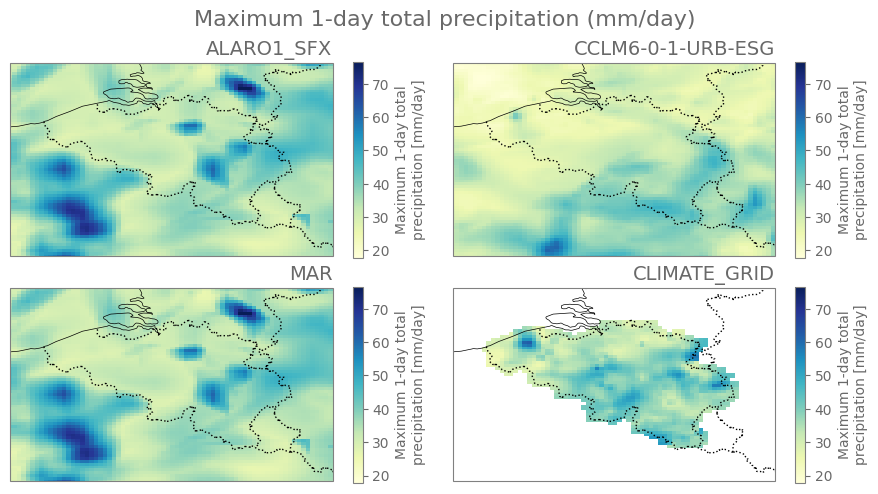

In [ ]:
# calculate time mean for every dataset in tree
def mean_over_time(ds):
    return ds.mean(dim='time')

dt_timmean = dt.map_over_subtree(mean_over_time)

# convert precipitation units from kg m-2 s-1 to mm day-1
# Does not work yet!!! 

#Compute the data once (not for every diagnostic separately)
with ProgressBar():
    dt = dt.compute()
    dt_timmean = dt_timmean.compute()

## Spatial Bias
# Climate grid as reference
ds_ref =  dt["obs/CLIMATE_GRID"].to_dataset()
with ProgressBar():
    dt_spatialbias = dt_timmean.RCM.map_over_subtree(SpatialBias, ds_ref)

# ----------------------------------
### Plot timmean maps

# define colormaps per variable
d_cmap_sequential = {
    "TNn": 'YlOrRd',
    "TXx": 'YlOrRd',
    "Rx1day": 'YlGnBu' }

## Plot maps absolute values
for variable in variables: 

    # create figure 
    fig, axes = plt.subplots(2,2,figsize=(9,5), subplot_kw={"projection": ccrs.PlateCarree()})
    axes = axes.flatten()

    # get overall min and max
    overall_min, overall_max = get_dt_overall_min_max(dt_timmean, variable)

    # loop over datasets to do plotting
    for i, dt_leave in enumerate(dt_timmean.leaves):
        ax = axes[i]
        ds = dt_leave.to_dataset()
        ds[variable].plot(ax=ax, cmap=d_cmap_sequential[variable], vmin=overall_min, vmax=overall_max)
        ax.set_title(dt_leave.name, loc='right')
        ax.set_title(' ')
        _add_features(ax, region='belgium')

    fig.suptitle(f'{ds[variable].long_name} ({ds[variable].units})', fontsize=16)

    fig.tight_layout()
    # Mean maps
    plt.savefig(f"/dodrio/scratch/users/vsc31332/rmi/vsc31332_inne/ValEnsPy/CORDEX_eval_scripts/plots/timmean_{variable}.png")




/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_xesmf/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_xesmf/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_xesmf/lib/python3.10/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


KeyError: "No variable named 'TXx'. Variables on the dataset include ['lon', 'lat', 'Rx1day']"

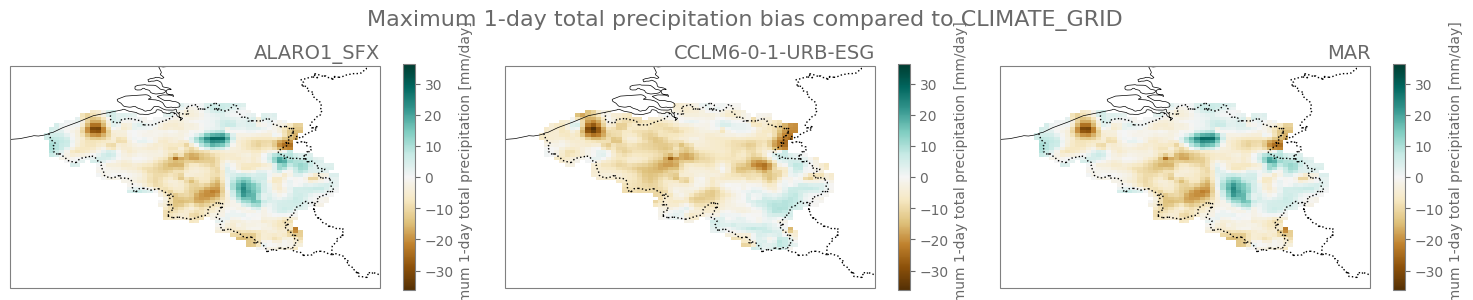

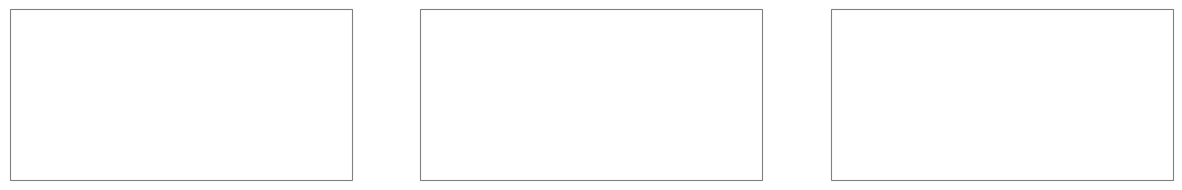

In [41]:
# ----------------------------------
## Plotting for spatial bias

# define colormaps per variable
d_cmap_diverging = { "TXx": 'RdBu_r',"TNn": 'RdBu_r', "Rx1day": 'BrBG' }


for variable in variables: 

    # plotting 
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={"projection": ccrs.PlateCarree()})
    axes = axes.flatten()

    # get overall min and max
    most_extreme = np.max([np.abs(overall_min),np.abs(overall_max)])

    for i, dt_leave in enumerate(dt_spatialbias.leaves):
        ax = axes[i]
        ds_spbias = dt_leave.to_dataset()

        cbar_kwargs={"shrink": 0.52,  "label" : f'{ds[variable].long_name} [{ds[variable].units}]' }
        
        SpatialBias.plot(ds_spbias[variable], ax=ax, cmap=d_cmap_diverging[variable], cbar_kwargs = cbar_kwargs, vmin=-most_extreme, vmax=most_extreme )
          
        ax.set_title(dt_leave.name, loc='right')
        ax.set_title(' ')
        _add_features(ax, region='belgium')

        # add rmse
        # rmse = root_mean_square_error(dt.leaves[i][variable], ds_ref[variable]).values
        """
        ax.text(
        0.05, 0.1,  # Position: 2% from left, 2% from bottom (relative to axis)
        f"RMSE: {rmse:.2f} {ds[variable].units}",  
        transform=ax.transAxes,  # Use axis-relative coordinates (0,0) = bottom-left
        fontsize=10,  
        verticalalignment='bottom',  
        horizontalalignment='left')
        """
    fig.suptitle(f'{ds[variable].long_name} bias compared to CLIMATE_GRID', fontsize=16, y=0.8)
    fig.tight_layout()

    plt.savefig(f"/dodrio/scratch/users/vsc31332/rmi/vsc31332_inne/ValEnsPy/CORDEX_eval_scripts/plots/spatialbias_{variable}.png")